In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In [3]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head().T

,0,1,2,3,4
person_age,22,21,25,23,24
person_income,59000,9600,9600,65500,54400
person_home_ownership,RENT,OWN,MORTGAGE,RENT,RENT
person_emp_length,123.0,5.0,1.0,4.0,8.0
loan_intent,PERSONAL,EDUCATION,MEDICAL,MEDICAL,MEDICAL
loan_grade,D,B,C,C,C
loan_amnt,35000,1000,5500,35000,35000
loan_int_rate,16.02,11.14,12.87,15.23,14.27
loan_status,1,0,1,1,1
loan_percent_income,0.59,0.1,0.57,0.53,0.55


In [4]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [5]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
df.head().T

,0,1,2,3,4
person_age,22,21,25,23,24
person_income,59000,9600,9600,65500,54400
person_home_ownership,rent,own,mortgage,rent,rent
person_emp_length,123.0,5.0,1.0,4.0,8.0
loan_intent,personal,education,medical,medical,medical
loan_grade,d,b,c,c,c
loan_amnt,35000,1000,5500,35000,35000
loan_int_rate,16.02,11.14,12.87,15.23,14.27
loan_status,1,0,1,1,1
loan_percent_income,0.59,0.1,0.57,0.53,0.55


In [7]:
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'y': 1, 'n': 0})

In [8]:
df.shape

(32581, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  int64  
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [10]:
# Check for duplicates
df.duplicated().sum()

np.int64(165)

In [11]:
# View the duplicated rows
df[df.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,rent,5.0,venture,b,6000,9.99,0,0.14,0,4
15989,23,90000,mortgage,7.0,education,b,8000,10.36,0,0.09,0,3
15995,24,48000,mortgage,4.0,medical,a,4000,5.42,0,0.08,0,4
16025,24,10000,rent,8.0,personal,a,3000,7.90,1,0.30,0,3
16028,23,100000,mortgage,7.0,education,a,15000,7.88,0,0.15,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,mortgage,2.0,homeimprovement,a,2500,5.42,0,0.06,0,12
32047,36,250000,rent,2.0,debtconsolidation,a,20000,7.88,0,0.08,0,17
32172,49,120000,mortgage,12.0,medical,b,12000,10.99,0,0.10,0,12
32259,39,40000,own,4.0,venture,b,1000,10.37,0,0.03,0,16


In [12]:
# Remove duplicates
df = df.drop_duplicates()

# Exploratory Data Analysis

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32416.0,27.747008,6.354100,20.00,23.00,26.00,30.00,144.00
person_income,32416.0,66091.640826,62015.580269,4000.00,38542.00,55000.00,79218.00,6000000.00
person_emp_length,31529.0,4.790510,4.145490,0.00,2.00,4.00,7.00,123.00
loan_amnt,32416.0,9593.845632,6322.730241,500.00,5000.00,8000.00,12250.00,35000.00
loan_int_rate,29321.0,11.017265,3.241680,5.42,7.90,10.99,13.47,23.22
loan_status,32416.0,0.218688,0.413363,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32416.0,0.170250,0.106812,0.00,0.09,0.15,0.23,0.83
cb_person_default_on_file,32416.0,0.176765,0.381475,0.00,0.00,0.00,0.00,1.00
cb_person_cred_hist_length,32416.0,5.811297,4.059030,2.00,3.00,4.00,8.00,30.00


In [14]:
# Look at numerical and categorical fetures
categorical_features = list(df.dtypes[df.dtypes == 'object'].index)
numerical_features = list(df.dtypes[df.dtypes != 'object'].index)

# From the output below, numerical_fetures includes converted variable which is our target therefore the tagert variable has to be removed
features = (categorical_features + numerical_features)
features.remove('cb_person_default_on_file')

print('Categorical Columns')
print(categorical_features)
print()
print('Numerical Columns')
print(numerical_features)
print()
print('Features')
print(features)

Categorical Columns
['person_home_ownership', 'loan_intent', 'loan_grade']

Numerical Columns
['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']

Features
['person_home_ownership', 'loan_intent', 'loan_grade', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']


In [15]:
# Check for missing values
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [16]:
df.isnull().sum()[df.isnull().sum() != 0]

person_emp_length     887
loan_int_rate        3095
dtype: int64

In [17]:
# fill the missing numerical features with 0
df.person_emp_length = df.person_emp_length.fillna(0)
df.loan_int_rate = df.loan_int_rate.fillna(0)

# cleaner way since we are filling all missing values with 0
df[numerical_features] = df[numerical_features].fillna(0.0)

In [18]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [19]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

person_age
[22 21 25 23 24]
58

person_income
[59000  9600 65500 54400  9900]
4295

person_home_ownership
['rent' 'own' 'mortgage' 'other']
4

person_emp_length
[123.   5.   1.   4.   8.]
36

loan_intent
['personal' 'education' 'medical' 'venture' 'homeimprovement']
6

loan_grade
['d' 'b' 'c' 'a' 'e']
7

loan_amnt
[35000  1000  5500  2500  1600]
753

loan_int_rate
[16.02 11.14 12.87 15.23 14.27]
349

loan_status
[1 0]
2

loan_percent_income
[0.59 0.1  0.57 0.53 0.55]
77

cb_person_default_on_file
[1 0]
2

cb_person_cred_hist_length
[3 2 4 8 7]
29



In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [21]:
# Look at the target variable
df_full_train.cb_person_default_on_file.value_counts(normalize=True)

cb_person_default_on_file
0    0.823461
1    0.176539
Name: proportion, dtype: float64

# Feature Importance

In [22]:
def mutual_info_default_score(series):
    return mutual_info_score(series, df_full_train.cb_person_default_on_file)

In [23]:
mi = df_full_train[categorical_features].apply(mutual_info_default_score)
mi.sort_values(ascending=False)

loan_grade               0.224028
person_home_ownership    0.002018
loan_intent              0.000193
dtype: float64

The feature 'loan_grade' is the most important categorical featurem

In [24]:
df_full_train[numerical_features].corrwith(df_full_train.cb_person_default_on_file).abs()

person_age                    0.003087
person_income                 0.003304
person_emp_length             0.022675
loan_amnt                     0.046445
loan_int_rate                 0.330634
loan_status                   0.175508
loan_percent_income           0.040485
cb_person_default_on_file     1.000000
cb_person_cred_hist_length    0.002172
dtype: float64

The feature 'loan_int_rate' is the most important numerical feature

In [25]:
len(df_train), len(df_val), len(df_test)

(19449, 6483, 6484)

In [26]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [27]:
y_train = df_train.cb_person_default_on_file.values
y_val = df_val.cb_person_default_on_file.values
y_test = df_test.cb_person_default_on_file.values

In [28]:
del df_train['cb_person_default_on_file']
del df_val['cb_person_default_on_file']
del df_test['cb_person_default_on_file']

# One Hot Encoding

In [29]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

X_train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(X_train_dict)

X_val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(X_val_dict)

X_test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(X_test_dict)

# Training Logistic Regression

In [30]:
# Training logistic regression with Scikit-Learn
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [31]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.26714916, 0.27427764, 0.22872886, ..., 0.15214775, 0.16705994,
       0.20963101], shape=(6483,))

In [32]:
from sklearn.metrics import roc_auc_score

auc  = roc_auc_score(y_val, y_pred)

print(f'The AUC of this model on the validation dataset is {round(auc, 4)}')

The AUC of this model on the validation dataset is 0.7571


# Parameter tuning to find best C for logistic Regresion

In [33]:
for C in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:


    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)

    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:, 1]

    auc  = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (C, auc))


0.0001 -> 0.721
0.001 -> 0.755
0.01 -> 0.757
 0.1 -> 0.756
   1 -> 0.757
  10 -> 0.756
 100 -> 0.758


1 seem to be the best value for C

# Training Decision Trree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7147441015495801

# Deision Tree Parameter Tuning

In [35]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.6f' % (depth, auc))

   1 -> 0.823492
   2 -> 0.880238
   3 -> 0.897228
   4 -> 0.898196
   5 -> 0.896925
   6 -> 0.898107
  10 -> 0.874708
  15 -> 0.826388
  20 -> 0.770715
None -> 0.705703


4 seems to be the best value for max_depth

In [36]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [37]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.898  0.897  0.897
5                 0.898  0.897  0.898
10                0.898  0.898  0.898
15                0.898  0.898  0.898
20                0.898  0.898  0.896
100               0.897  0.897  0.898
200               0.897  0.899  0.899
500               0.899  0.898  0.897

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

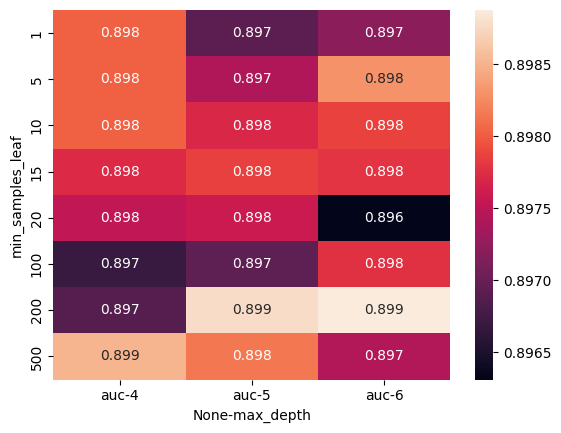

In [38]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

200 seems to be the best value for min_samples_leaf

# Final decision tree model parameters

In [39]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=200)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.8968841559850568

In [40]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))


|--- loan_int_rate <= 12.70
|   |--- loan_grade=c <= 0.50
|   |   |--- loan_grade=d <= 0.50
|   |   |   |--- loan_int_rate <= 2.71
|   |   |   |   |--- class: 0
|   |   |   |--- loan_int_rate >  2.71
|   |   |   |   |--- class: 0
|   |   |--- loan_grade=d >  0.50
|   |   |   |--- class: 1
|   |--- loan_grade=c >  0.50
|   |   |--- loan_int_rate <= 12.26
|   |   |   |--- cb_person_cred_hist_length <= 3.50
|   |   |   |   |--- class: 1
|   |   |   |--- cb_person_cred_hist_length >  3.50
|   |   |   |   |--- class: 0
|   |   |--- loan_int_rate >  12.26
|   |   |   |--- class: 0
|--- loan_int_rate >  12.70
|   |--- loan_amnt <= 2975.00
|   |   |--- person_income <= 34520.00
|   |   |   |--- class: 1
|   |   |--- person_income >  34520.00
|   |   |   |--- class: 1
|   |--- loan_amnt >  2975.00
|   |   |--- person_income <= 66707.50
|   |   |   |--- person_income <= 34057.00
|   |   |   |   |--- class: 1
|   |   |   |--- person_income >  34057.00
|   |   |   |   |--- class: 0
|   |   |--- pe

In [41]:
from sklearn.ensemble import RandomForestClassifier

scores = []
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

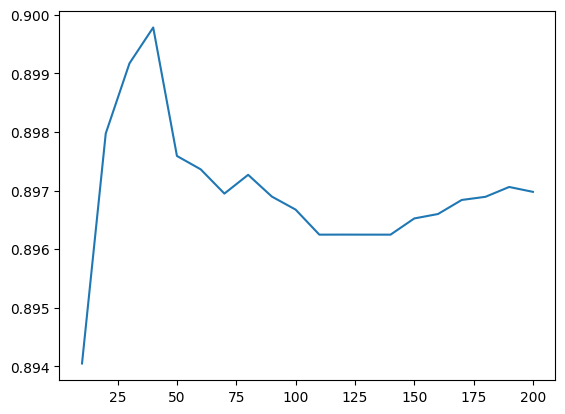

In [42]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
plt.plot(df_scores.n_estimators, df_scores.auc)

Best value for n_estimator is 39

In [43]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

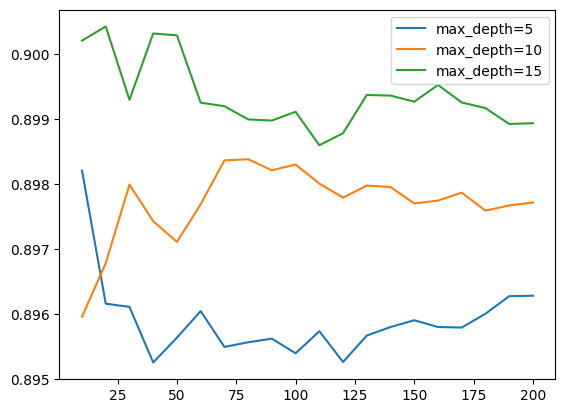

In [44]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

Best value of max_depth is 15

In [45]:
max_depth = 15

scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [46]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

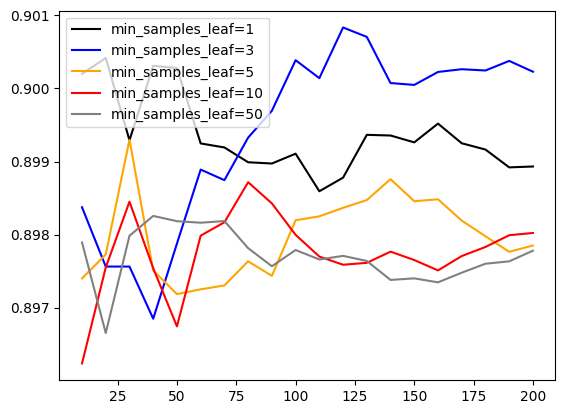

In [47]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

Best value for min_sample_leaf is 1

# Final Random Forest Model Parameters

In [48]:
rf = RandomForestClassifier(n_estimators=39,
                            max_depth=max_depth,
                            min_samples_leaf=1,
                            random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.9004074367616064

Training XGBoost

In [49]:
import xgboost as xgb

In [50]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [51]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [52]:
y_pred = model.predict(dval)


In [53]:
roc_auc_score(y_val, y_pred)


0.8980377145685635

XGBoost Parameter Tuning

# Selecting the best model

In [54]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=200)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.8968841559850568

In [55]:
rf = RandomForestClassifier(n_estimators=39,
                            max_depth=max_depth,
                            min_samples_leaf=1,
                            random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.9004074367616064

In [56]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

y_pred = model.predict(dval)

roc_auc_score(y_val, y_pred)


0.8980377145685635